In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

# automatic reloading of modules when they change
%load_ext autoreload
%autoreload 2


In [2]:
def rule_1_full(d=100, num_samples=1000, num_iters=100, lr=1e-0, kappa=0.5, seed=42):

    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    np.random.seed(seed)

    # generate correlated data
    dist = torch.distributions.MultivariateNormal(torch.zeros(d), 0.8 * torch.eye(d) + 0.2 * torch.ones((d, d)))
    data = dist.sample((num_samples,))

    neg_eye = 1.0 - torch.eye(d)

    R = torch.eye(d)
    loss = torch.zeros(num_iters)
    for i in range(num_iters):

        X = data @ R

        # covariance without diagonal
        C = neg_eye * (X.T @ X / len(X))
            
        # unit variance term averaged over datapoints
        v = torch.mean(X**2 - 1.0, axis=0)

        # compute update; equation (4) in technical note
        # R = R - (lr/d) * ((1.0 - kappa)/(d-1) * C @ R + 2 * kappa * v * R)
        R = R - lr * ((1.0 - kappa)/(d-1) * C @ R + 2 * kappa * v * R)

        # compute loss
        loss[i] = (1/d) * ((1-kappa)/(d-1) * torch.sum(C**2) + kappa * torch.sum(v**2))
        # loss[i] = (1-kappa)/(d-1) * torch.sum(C**2) + kappa * torch.sum(v**2)

    return R, loss





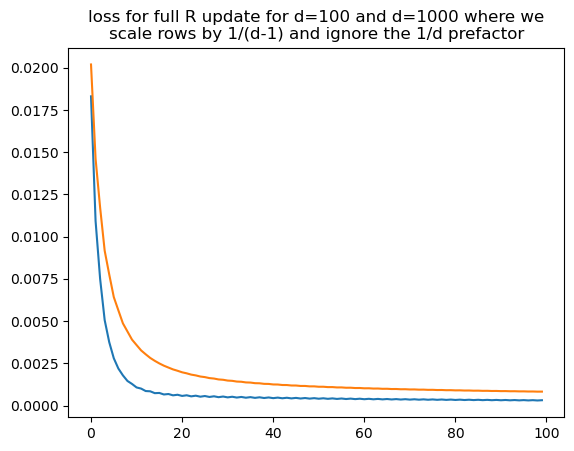

In [5]:
R, loss = rule_1_full(d=10)
plt.plot(loss)

R, loss = rule_1_full(d=1000)
plt.plot(loss)

plt.title('loss for full R update for d=100 and d=1000 where we\nscale rows by 1/(d-1) and ignore the 1/d prefactor');
